# Lab 10: Visual Analytics Data application using Streamlit and Machine Learning (Evaluable)

# Lab goals:
In this project, we will build a Visual Analytics app that combines Streamlit and Machine Learning. In particular, our Data web app will explore and predict the salary of the software developers depending on the country, experience and level of education.

As we have done during the course, we will follow the end-to-end **Machine Learning process**:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management)
2. Model Training: training a regression model. Analysis of metrics (i.e. R2_score, mean squared error,...)
3. Creating a Visual Analytics web app based on Streamlit to facilitate the exploration of data and prediction of the salary.

# Practice Information:
**Due date:** By end of November, 12th (23:55h)

**Submission procedure:** via Moodle.

**Name:** Telmo Linacisoro

**NIA:** 253251



# 0. Context:  

We work in a Human Resources Consultant company supporting to the business consultant team. A common request from our customers from the IT sector is a salary recommendation to be applied to their software development employees.
Therefore, we have been requested to build a Web app with two minimum goals:
- 1 Exploration of salaries per country and experience
- 2 Prediction of a salary based on country, experience and education

We have access to an annual survey by Stack Overflow where we can find more than 67K software developers' answers. Part of the survey includes salary, experience, country, full/partial time employee, language, demographic information and so on.

Taking into consideration the request and this amazing survey you should develop your **own Visual Analytics Data Web** with two main parts:
- a) This Jupyter Notebook to explore the data (i.e. EDA), prepare the data and build a Machine Learning model that predicts the salary of a software employee at least based on **Country**, **Education** and **Experience** variables  
- b) A Streamlit app to explore the data and execute the salary prediction

# 1. Data Gathering
In the survey_results_schema.csv and the survey_results_public.csv you will obtain the schema of the survey and the responses.

Let's import some basic libraries and upload the **survey_results_public.csv** file.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

Let's explore the data:

In [ ]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

# 2. Data Exploration and Data Wrangling

**EX1** Let's select the variables we are interested in: `Country`, `Education`, `YearsCodePro`, `Employment` and `ConvertedCompYearly`. Rename `ConvertedCompYearly` to `Salary`.

In [ ]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']].rename(columns={'ConvertedCompYearly': 'Salary'})

Let's see the data again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       71771 non-null  object 
 1   EdLevel       71571 non-null  object 
 2   YearsCodePro  51833 non-null  object 
 3   Employment    71709 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


**EX2** Remove the registers with any null in the features and verify all registers are not null

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


**EX3** Select the registers in the dataset that are full-employed and remove "employment" column

In [ ]:
df = df[df['Employment'] == "Employed, full-time"]
df = df.drop(columns=['Employment'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX4** Count the regiters per country and move all countries with less than cut-off registers to "Other"

In [ ]:
threshold = 400

country_counts = df['Country'].value_counts()

countries_to_other = country_counts[country_counts < threshold].index

df['Country'] = df['Country'].apply(lambda x: 'Other' if x in countries_to_other else x)

country_counts_updated = df['Country'].value_counts()

**EX5** To analyze the distribution of salaries per countries, build a boxplot per `country` and `salary`.

<Figure size 1200x800 with 0 Axes>

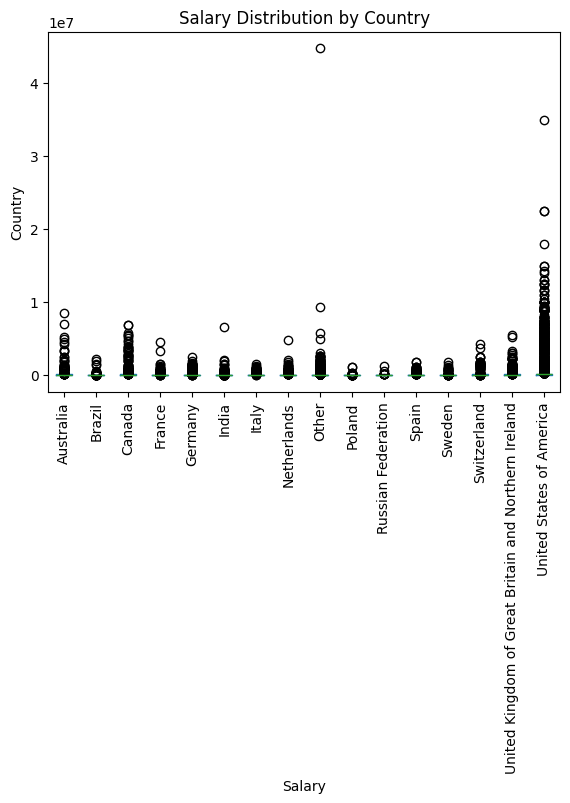

In [ ]:
plt.figure(figsize=(12, 8))

df.boxplot(column='Salary', by='Country', vert=True, grid=False)

plt.title('Salary Distribution by Country')
plt.suptitle('')
plt.xlabel('Salary')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

**EX6** To improve the resolution, filter the dataset based on salary between 10K and 250K and verify the distribution of salaries per country. Which are the most relevant insights based on these new boxplots?

<font color='red'>First of all, from the difference between this plot and the one above, we can see that there are many outliers, and what’s more, some of them are very extreme. Moreover, most of the outliers are at the top, with very few at the bottom. In general, there seems to be a trend depending on the country; however, it has a lot of fluctuations.


<Figure size 1200x800 with 0 Axes>

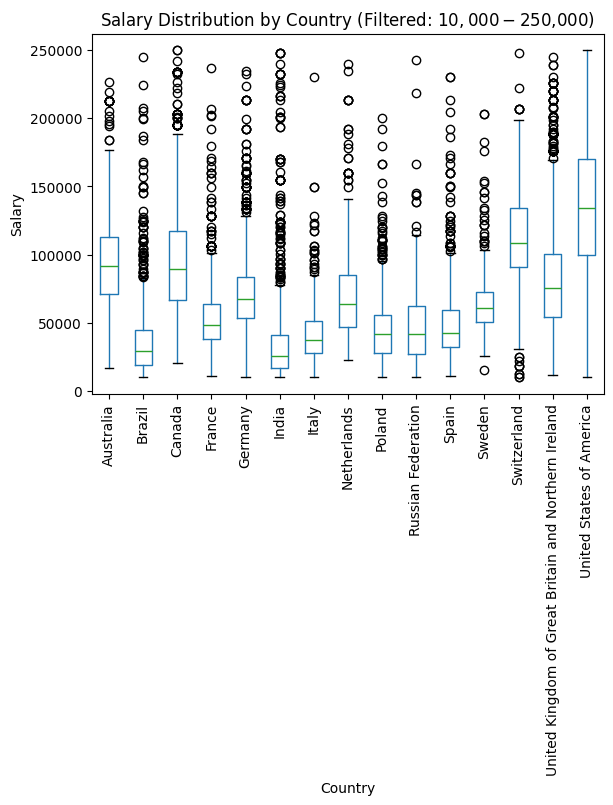

In [ ]:
df = df[(df['Salary'] >= 10000) & (df['Salary'] <= 250000)]
df = df[df['Country'] != 'Other']

plt.figure(figsize=(12, 8))

df.boxplot(column='Salary', by='Country', vert=True, grid=False)

plt.title('Salary Distribution by Country (Filtered: $10,000 - $250,000)')
plt.suptitle('')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Let's prepare the `YearsCodePro` to integer. We will build a new **clean_experience()** function to encode over 50 years and below 0.5 years of experience respectively.

In [ ]:
print(type(df["YearsCodePro"]))
df["YearsCodePro"].unique()

<class 'pandas.core.series.Series'>


array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [ ]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19884 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       19884 non-null  object 
 1   EdLevel       19884 non-null  object 
 2   YearsCodePro  19884 non-null  float64
 3   Salary        19884 non-null  float64
dtypes: float64(2), object(2)
memory usage: 776.7+ KB


Let's normalize the different values of the `EdLevel`. We will build a new **clean_education** function to normalize the education levels.

In [ ]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [ ]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

**EX7** Encode using **LabelEncoder** function the `EdLevel` and `Country` columns. Store them into the same `EdLevel` and `Country` columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
le_country = LabelEncoder()

df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['Country'] = le_country.fit_transform(df['Country'])

# 2. Modelling

We are ready to build a ML model to predict the salary based on the 3 variables: country, education level and years of experience.

**EX8** Split into train and test dataset and verify the length of all datasets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Country', 'EdLevel', 'YearsCodePro']]  # Features
y = df['Salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Length verification
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_train: 15907
Length of y_train: 15907
Length of X_test: 3977
Length of y_test: 3977


**EX9** Apply a Linear Regression model to fit and evaluate the performance of the prediction based on the mean squared error.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression\nMSE","${:,.02f}".format(mse_lr))

Linear Regression
MSE $45,169.38


**EX10** Repeat the **EX9** using a RandomForest model. Has it improved the mean squared error?

<font color='red'>The MSE has decreased because the Random Forest model is a non-linear model, which is better in capturing complex relationships in the data compared to the Linear Regression model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest\nMSE","${:,.02f}".format(mse_rf))

Random Forest
MSE $36,430.29


In order to find the best hyperparameters for the regression model, we will use **GridsearchCV** apply to the Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

Once calculate the **best estimator**, we will apply to our use case and calculate the **mean squared error**.

In [ ]:
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

$35,386.61


**EX11** Calculate the performance based on **R2 score** of the regression model fitted with the best estimator. Which is your consideration about the performance of the model? Justify your answer. Which visualization plot should we use to evaluate the performance of the regression model?

<font color='red'>Two useful visualization plots are the Actual vs Predicted Plot and the Residuals Plot, which help ensure there are no patterns in the residuals and that the predictions are accurate. In general, we can see that this holds, although the actual values exhibit relatively high variance with respect to the predictions.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)

print(f"R² Score: {r2:.4f}")

R² Score: 0.5838


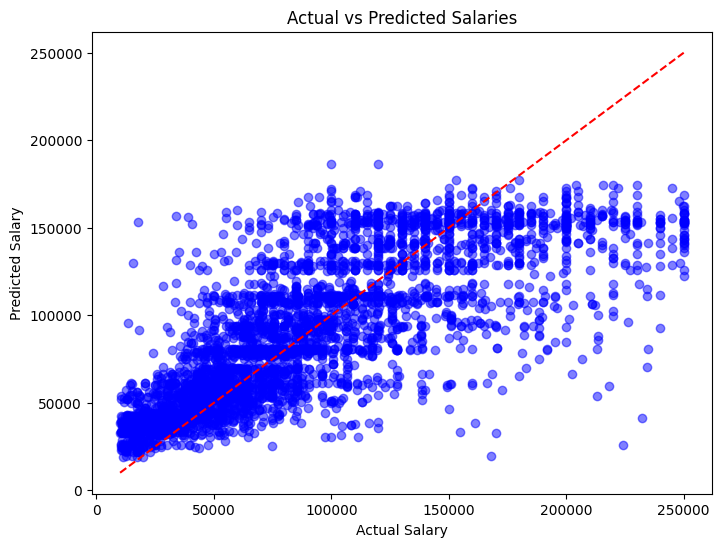

In [ ]:
# Actual vs Predicted Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

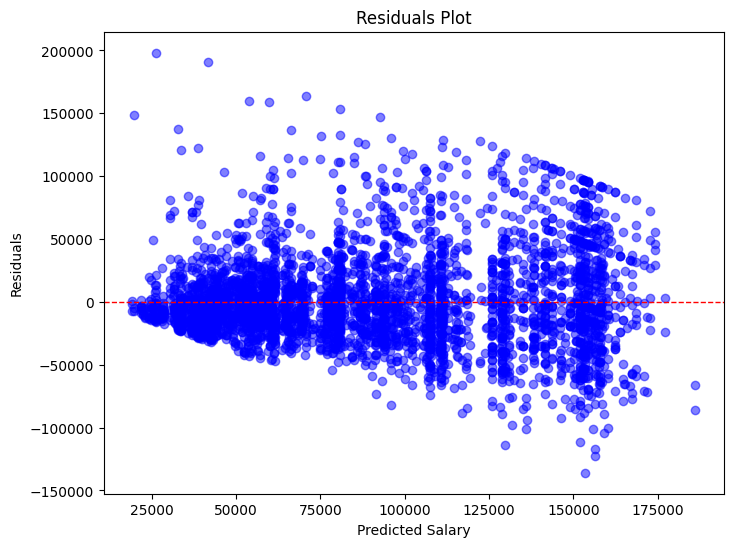

In [ ]:
# Residuals Plot

residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--',linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()

**EX12** Make a prediction for a software developer in `Spain`, with `Master's degree` and 15 years of experience.

In [ ]:
input_data = {
    'Country': 'Spain',
    'EdLevel': 'Master’s degree',
    'YearsCodePro': 15
}

# Ssame column names as during training
input_data_df = pd.DataFrame([input_data])

# Encoding of the categorical variables
input_data_df['Country'] = le_country.transform(input_data_df['Country'])[0]
input_data_df['EdLevel'] = le_education.transform(input_data_df['EdLevel'])[0]

input_data_df = input_data_df[['Country', 'EdLevel', 'YearsCodePro']]  # Reorder to match the feature order
X_sample = input_data_df[['Country', 'EdLevel', 'YearsCodePro']].values

predicted_salary = random_forest_reg.predict(input_data_df)

print(f"Predicted Salary: ${predicted_salary[0]:,.2f}")

Predicted Salary: $61,580.72


# 3. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [ ]:
import pickle

In [ ]:
data = {"model": random_forest_reg, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

You can also make a prediction with a sample as follows:

In [ ]:
y_pred = regressor_loaded.predict(X_sample)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([61580.7181844])

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.